#  Linear regression

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

In [10]:
from google.colab import files
uploaded = files.upload()
!ls

Saving ex1data2.txt to ex1data2 (1).txt
'ex1data2 (1).txt'   ex1data2.txt   sample_data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y
X = data[:,0:2]
y = data[:,[2]]

print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i,0].item():.0f}')


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


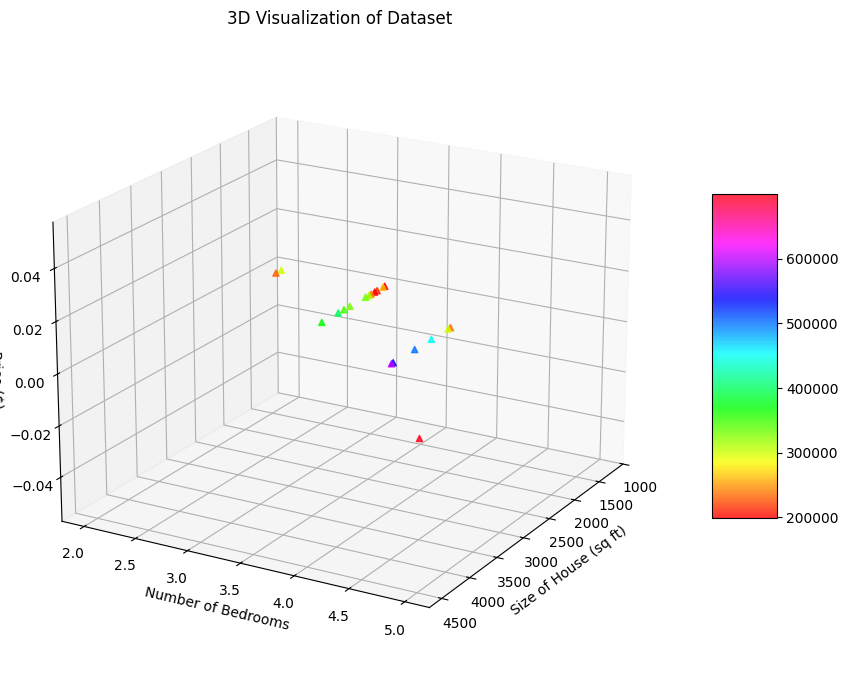

In [2]:
# ==================== Part 1: Plotting ====================
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points with red x markers
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')
# Label axes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# Set grid and view angle similar to MATLAB
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

# Feature normalization

Your task here is to complete the code in featureNormalize.m to

*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values
by their respective standard deviations

The mean and std should be:

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [3]:

X = data[:, 0:2]
def featureNormalize(X):
  X_mean = np.mean(X, axis=0)
  X_std = np.std(X, axis=0, ddof = 1)
  X_norm = (X-X_mean)/X_std
  return X_norm, X_mean, X_std


[X,mu, sigma] = featureNormalize(X)
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')
print(X.shape)

mu= [2000.68085106    3.17021277], std = [7.94702354e+02 7.60981887e-01]
First 10 examples from the dataset:
x = [0.1300 -0.2237]
x = [-0.5042 -0.2237]
x = [0.5025 -0.2237]
x = [-0.7357 -1.5378]
x = [1.2575 1.0904]
x = [-0.0197 1.0904]
x = [-0.5872 -0.2237]
x = [-0.7219 -0.2237]
x = [-0.7810 -0.2237]
x = [-0.6376 -0.2237]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function:
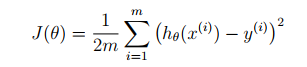

where the hypothesis h is given by

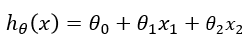




In [4]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    h = X @ theta
    E = y - h
    E_square = E.T @ E
    J = 1/(2*m)*E_square
    return J

m = data.shape[0]
X = data[:, 0:2]
[X,mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])
print(X[0:5,:])
theta = np.zeros((3, 1))
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")


[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]
 [ 1.          1.25747602  1.09041654]]
Model parameters: [[0.]
 [0.]
 [0.]]
Cost function: [[6.55915481e+10]]


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

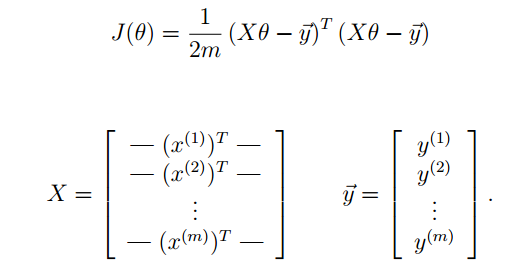

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

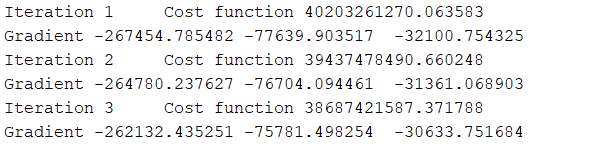


In [5]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 3
theta = np.zeros((3, 1))
alpha = 0.01
def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y)  # number of training examples
  J_history = np.zeros(iterations)

  for iter in range(iterations):

      h = X @ theta
      E = h - y
      grad_J = (1/m)*(X.T @ (E))
      theta = theta - alpha * grad_J

      J_history[iter] = cost_function(theta,X, y)
      print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J[0, 0]:.3f} {grad_J[1, 0]:.3f} {grad_J[2, 0]:.3f}")
  return theta, J_history

theta, J_history = gradientDescent(X, y, theta, alpha, iterations);
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
input_features = np.array([2000, 3])
normalized_features = (input_features - mu) / sigma
print(normalized_features)
# Add the bias term (1) as the first element
predict1 = np.hstack([1, normalized_features]) @ theta
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a profit of ${(predict1 * 10000).item():.2f}')




Iteration 1	Cost: 64300749594.565956	Gradient: -340412.660 -104632.934 -54123.684
Iteration 2	Cost: 63036794964.819687	Gradient: -337008.533 -103312.240 -53020.519
Iteration 3	Cost: 61799111840.657433	Gradient: -333638.448 -102010.519 -51935.389
Theta found by gradient descent:  [10110.59640202  3099.55692698  1590.7959126 ]
[-0.00085674 -0.22367519]
For a house with 2000 sqft and 3 bedrooms, we predict a profit of $97521193.23


/tmp/ipykernel_4005/1061446586.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_history[iter] = cost_function(theta,X, y)


# Visualization

Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against the number of the iterations.

Iteration 1	Cost: 64300749594.565956	Gradient: -340412.660 -104632.934 -54123.684
Iteration 2	Cost: 63036794964.819687	Gradient: -337008.533 -103312.240 -53020.519
Iteration 3	Cost: 61799111840.657433	Gradient: -333638.448 -102010.519 -51935.389
Iteration 4	Cost: 60587140419.705620	Gradient: -330302.063 -100727.484 -50868.013
Iteration 5	Cost: 59400333187.446388	Gradient: -326999.043 -99462.857 -49818.116
Iteration 6	Cost: 58238154637.679726	Gradient: -323729.052 -98216.361 -48785.425
Iteration 7	Cost: 57100080999.611221	Gradient: -320491.762 -96987.725 -47769.673
Iteration 8	Cost: 55985599971.401459	Gradient: -317286.844 -95776.680 -46770.596
Iteration 9	Cost: 54894210460.017036	Gradient: -314113.976 -94582.964 -45787.934
Iteration 10	Cost: 53825422327.227722	Gradient: -310972.836 -93406.316 -44821.432
Iteration 11	Cost: 52778756141.597946	Gradient: -307863.107 -92246.481 -43870.838
Iteration 12	Cost: 51753742936.324738	Gradient: -304784.476 -91103.208 -42935.905
Iteration 13	Cost: 50

/tmp/ipykernel_4005/1061446586.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_history[iter] = cost_function(theta,X, y)


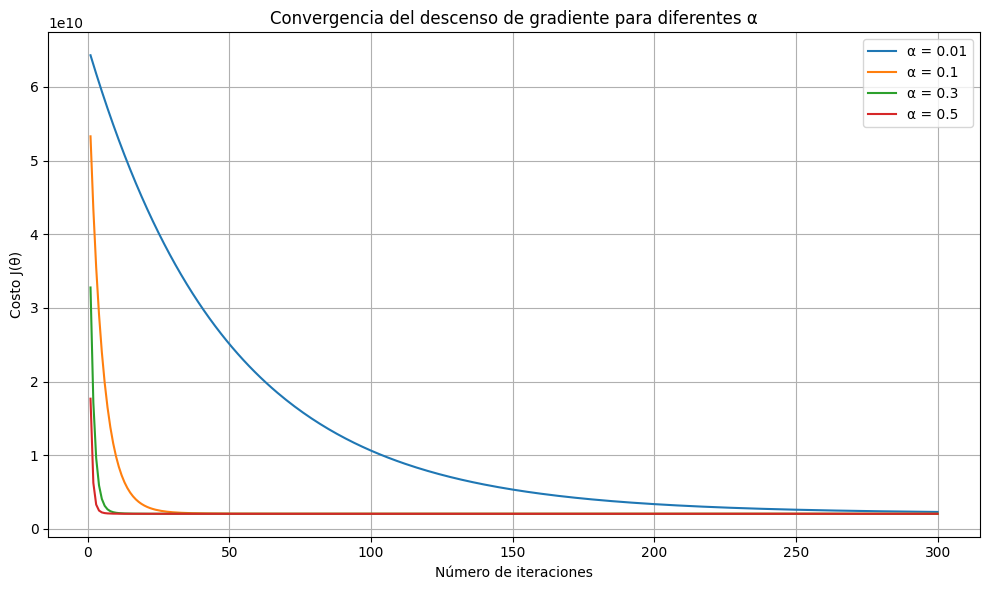

In [6]:
import numpy as np
import matplotlib.pyplot as plt



iterations = 300
theta_init = np.zeros((3, 1))
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])
matrix_J = np.zeros((iterations, len(alpha_vector)))

for i, alpha in enumerate(alpha_vector):
    theta = theta_init.copy()
    theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
    matrix_J[:, i] = J_history  # guarda el historial en cada columna

plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_vector):
    plt.plot(range(1, iterations + 1), matrix_J[:, i], label=f'α = {alpha}')
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J(θ)')
plt.title('Convergencia del descenso de gradiente para diferentes α')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


